# Covariance and Correlation - Lab

## Introduction

In this lab, you will calculate covariance and correlation for some data in Python lists by using the formulas shown in the previous lesson. 

## Objectives

You will be able to: 
- Calculate covariance and correlation  
- Declare and use a function with arguments   


## The data

The two variables include 20 heights (in inches) and weights (in pounds). This will help us focus more on seeing covariance and correlation in action!

At this point, you should be able to calculate the average height and average weight. You can also explain the medians, variances, and standard deviations for this dataset.

But all of those measurements are only concerned with a **single variable**. In this lab, you'll answer the following questions:

1. How does height interact with weight? 
2. Does weight increase as height increases?
3. Are weight and height not related at all?

There are always exceptions, but when you look at the population in general, taller people will tend to weigh more than shorter people. While you should *always* be cautious when generalizing, generalization of information can be very useful as it shows you a bigger picture that you can build your intuitions upon. This is also what a lot of core statistical principles are built upon.


First, run the below cells to get the heights and weights into the memory. 

In [1]:
# Run this cell
height = [68, 71, 61, 69, 71, 58, 72, 73, 58, 74, 
          61, 59, 69, 68, 64, 69, 72, 66, 65, 69]
weight = [165, 201, 140, 170, 192, 125, 195, 205, 
          115, 210, 135, 125, 172, 175, 145, 170, 
          200, 155, 150, 171]

## Calculating the covariance 

Here's the covariance formula once again:  

$$cov (x,y) = \frac{1}{n-1}\displaystyle\sum_{i=1}^{n}(x_i -\bar x)(y_i - \bar y)$$

Note that we divide by $(n-1)$ here, because of the assumption that this particular data is a _sample of a bigger population_. The bigger population here could be the entire world population. When working with populations. The general rule is to divide by $n$. When working with a sample, you should divide by $n-1$. In practice, however, you'll see the two formulas are often being used interchangeably. 

### Mean normalization 

Looking at the formula of covariance, you'll notice that it is composed out of $(x_i -\bar x)$ and $(y_i -\bar y)$. These are also known as the **mean normalized** variables $x$ and $y$. The idea is that you take each element in $x$ and $y$ and respectively subtract the mean of $x$ and $y$. The result is that your "altered" x and y now have mean 0.

So how do you do  this? You can write a function that takes in a vector, calculates the mean of this vector and subtracts the calculated mean value from each element to calculate $(x_i -\bar x)$ and  $(y_i -\bar y)$ . 


In [5]:
# Write a function to take in an iterable, calculate the mean and subtract the mean value
# from each element, creating and returning a new list. 
def mean_normalize(var):

    mean = sum(var)/len(var)
    normalized_list = []
    for i in var:
        normalized_value = i - mean
        normalized_list.append(normalized_value) 
    return normalized_list

mean_normalize([1, 2, 3, 4, 5]), mean_normalize([11, 22, 33, 44, 55])

([-2.0, -1.0, 0.0, 1.0, 2.0], [-22.0, -11.0, 0.0, 11.0, 22.0])

Great! You'll see that our function maintains the _variance_ of list elements and moves the mean to zero. As a quick test, you can visualize what exactly happens to the data with mean normalization. 

In [6]:
# Mean normalize the height 
height_normalized = None

Now, run the cell below to visualize the data. 

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:200: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


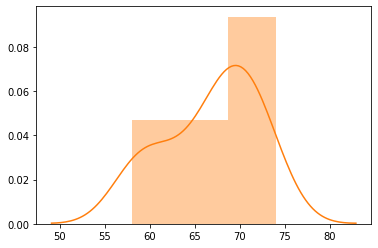

In [7]:
# Visualize the height data distribution before and after mean normalization 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.distplot(height_normalized)
sns.distplot(height);

There you go! The _shape_ of the data isn't changed, but the mean is just shifted! You can also try this for the `weight` variable if you wish.

### The dot product
Now that you know how to normalize the variables `height` and `weight`, you have to go ahead and take the _dot product_ of these two normalized variables.

> A dot product is a linear algebraic operation that takes two equal-length sequences of numbers and returns a single number which can be used as a measure of similarity between these sequences (also known as vectors).

[Here is a great article explaining this in detail](https://betterexplained.com/articles/vector-calculus-understanding-the-dot-product/).

For two vectors `a` and `b`, a dot product is calculated by multiplying each element of one vector to its counterpart in the second, and then adding them up together. Imagine you want to take the dot product of two variables `a` and `b`:

```
 a[0] * b[0] + a[1] * b[1] + a[2] * b[2] ...

```

Let's write a function that takes two iterables and returns their dot product. 

In [8]:
# Write a function to calculate the dot product of two iterables 

def dot_product(x, y):
    product_list = []
    zipped_values = zip(x,y)
    for i in zipped_values:
        product = i[0] * i[1]
        product_list.append(product)
    return sum(product_list)
        

a = [1, 2, 3]
b = [4, 5, 6]
print(dot_product(a,b))
print(list(zip(a, b)))

#  32  calculated as (1*4 + 2*5 + 3*6)

32
[(1, 4), (2, 5), (3, 6)]


Now that you have the numerator of the formula sorted out, let's finally write a function `covariance()` that takes the `height` and `weight` lists and returns the covariance value using the functions you created earlier. 

In [10]:
# Calculate covariance using functions above

def covariance(var1, var2):
    if len(var1) == len(var2):
        n = len(var1)
        mean_1 = mean_normalize(var1)
        mean_2 = mean_normalize(var2)
    return (1/(n-1)) * dot_product(mean_1, mean_2)

covariance(height, weight)


# Uncomment below to check your function
# covariance(height, weight)

# 144.75789473684208

144.75789473684208

Remember that covariance is a metric that is hard to interpret. Run the cell below to visualize `height` and `weight` on a scatter plot! 

In [ ]:
# Plot a scatter graph between height and weight to visually inspect the relationship 
plt.scatter(height, weight);

So we can see there is quite a bit of positive relationship between the two, but a covariance value is a bit hard to interpret. So let's try calculating the correlation. 

## Calculating the correlation

Once again, here's the formula to calculate the correlation. 
$$ r = \frac{\sum_{i=1}^{n}(x_i -\bar x)(y_i - \bar y)} {\sqrt{\sum_{i=1}^{n}(x_i - \bar x)^2 \sum_{i=1}^{n}(y_i-\bar y)^2}}$$


Now, use the functions `mean_normalize()` and `dot_product()` to define a function, `correlation()` that calculates the correlation between two lists. 

_Hint: You can use the `sqrt()` function from the `math` package to calculate the square root._

In [ ]:
# Calculate Correlation between two variables using formula above
import math
def correlation(var1, var2):
    
    pass



# correlation(height, weight)
# 0.98

A correlation of 0.98, that's very close to 1! That means that there is clearly a strong relationship between height and weight. At least, for this particular sample!  And that's one of the key takeaways, sample size plays a major rule in determining the nature of a variable and its relationship with other variables. The set of 20 records we seem to correlate highly, but if you look at 20 other people, you'll see that this result will be different. The correlation here will depend on the *sample*, and you'll see that this will differ more clearly when working with smaller samples.

_Note:_ A correlation of a variable with itself is always equal to 1.  

## Summary 

In this lab, you learned how to calculate the covariance and correlation between variables. You also looked at mean normalization and dot products. Finally, you learned how to calculate these measures using pandas built-in methods. 